# <a id="contents"></a> Table of Contents

1. [Import Libraries](#imports)
2. [Standardizing Data](#standardizing-data)
3. [Loading Position Data](#loading-data)
4. [Descriptive Statistics and Visualization](#descriptive-stats)
   - 4.1 [Descriptive Statistics Calculation](#descriptive-stats-calc)
   - 4.2 [Displaying Descriptive Statistics as Heatmap](#descriptive-stats-heatmap)
5. [Distribution and Box Plot Visualization](#distribution-and-box-plot)
6. [Correlation Heatmaps](#correlation-heatmaps)


<a id="imports"></a>

## <div class='section'>Section 1: Import Libraries</div>


In [48]:
import itertools
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

<a id="standardizing-data"></a>

## <div class='section'>Section 2: Standardizing Data</div>

[Return to contents](#contents)

Here, we define a `standardize` function that will be used to scale and standardize the data to ensure that each feature contributes equally to any subsequent analysis so that we can avoid biases due to differences in scale.


In [49]:
def standardize(df):
    numeric_columns = df.select_dtypes(include='number').columns
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[numeric_columns])

    # Convert standardized data back to a dataframe for PCA
    standardized_df = pd.DataFrame(standardized_data, columns=numeric_columns)
    return standardized_df


<a id="loading-data"></a>

## <div class='section'>Section 3: Loading Position Data</div>

[Return to contents](#contents)

Here, we load and `standardize` data from CSV files for each position, then organize them in a dictionary.


In [50]:
# Make dataframes
goalkeepers = standardize(pd.read_csv("data/GK_relevant_stats.csv"))
defenders = standardize(pd.read_csv("data/DF_relevant_stats.csv"))
midfielders = standardize(pd.read_csv("data/MF_relevant_stats.csv"))
forwards = standardize(pd.read_csv("data/FW_relevant_stats.csv"))

# Dictionary of dataframes for each position
dataframes = {
    'Goalkeepers': goalkeepers, 
    'Defenders': defenders, 
    'Midfielders': midfielders, 
    'Forwards': forwards
}

In [51]:
goalkeepers

,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,CS,CS%,PSxG,PSxG/SoT,PSxG+/-,Opp,Stp,Stp%
0,-0.344,0.193,-1.132,-1.169,-1.129,-1.129,-1.045,-0.079,-1.140,-1.167,-2.572,-0.965,-1.143,-1.049,3.324,-0.016,-1.082,-0.970,-0.281
1,-0.767,0.834,-0.840,-0.810,-0.817,-0.817,-0.949,-0.214,-0.984,-0.985,-0.224,-0.524,0.513,-0.990,-0.255,-0.237,-0.971,-0.463,1.285
2,0.714,-0.660,-0.767,-0.810,-0.808,-0.810,-0.758,-0.121,-0.890,-0.940,-0.481,-0.744,-0.313,-0.871,-0.255,-0.678,-0.855,-0.970,-0.613
3,-1.613,1.687,-0.183,-0.163,-0.164,-0.164,0.053,-0.083,-0.218,-0.349,-0.272,-0.524,-0.482,-0.194,-0.354,-1.313,-0.177,0.335,0.336
4,-0.978,1.047,0.766,0.772,0.760,0.757,0.864,-0.109,0.643,0.514,0.134,0.579,0.100,0.923,0.242,-0.044,0.743,1.350,0.241
5,-1.613,1.687,-0.767,-0.881,-0.811,-0.810,-0.424,0.047,-0.702,-0.826,-0.332,-0.965,-1.143,-0.461,0.540,-0.320,-0.890,-0.825,-0.210
6,0.079,-0.020,-1.059,-1.025,-1.035,-1.035,-0.854,0.004,-0.984,-1.008,-0.654,-0.965,-1.143,-0.921,0.143,-0.127,-1.017,-0.825,0.181
7,-0.555,0.620,0.985,0.988,0.983,0.982,0.721,-0.146,0.424,0.219,-0.272,0.138,-0.343,0.706,0.441,-0.430,0.485,-0.390,-0.459
8,-0.132,0.193,1.423,1.419,1.388,1.389,0.530,-0.191,0.830,0.946,0.487,2.343,0.871,0.701,-0.255,0.922,0.733,0.262,-0.222
9,-0.132,0.193,-1.059,-1.025,-1.035,-1.035,-0.711,0.149,-0.937,-1.031,-1.604,-0.965,-1.143,-0.861,0.839,-0.899,-0.946,-0.825,-0.080


<a id="descriptive-stats"></a>

## <div class='section'>Section 4: Descriptive Statistics and Visualization</div>

[Return to contents](#contents)

Here, we calculate and visualize descriptive statistics for each position dataset which will provide insights into the central tendency, spread, and range of values for each feature in the dataset.


<a id="descriptive-stats-calc"></a>

#### <div class='sub-section'>4.1: Descriptive Statistics Calculation</div>

Here, we calculate the mean, standard deviation, median, min, max, and range of each numeric feature in the dataset.




In [52]:
def descriptive_stats(df):
    numeric_df = df.select_dtypes(include='number')
    stats = numeric_df.describe().T  # Transpose for readability
    stats['median'] = numeric_df.median()  # Add median
    stats['range'] = stats['max'] - stats['min']  # Calculate range
    return stats[['mean', 'std', 'median', 'min', 'max', 'range']]


<a id="descriptive-stats-heatmap"></a>

#### <div class='sub-section'>4.2: Displaying Descriptive Statistics as Heatmap</div>

Here, we create heatmaps to visualize the descriptive statistics for each feature and to help us easily spot outliers, patterns, and distributions across different features.

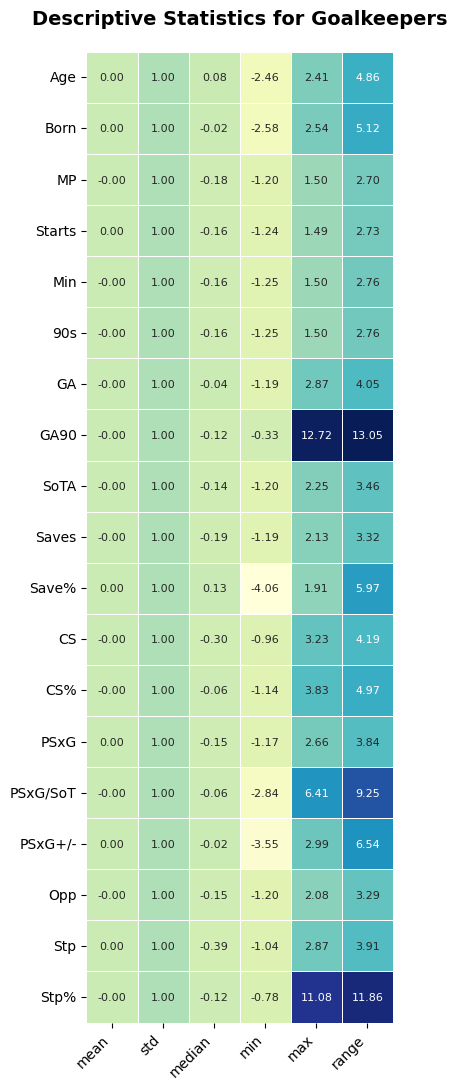

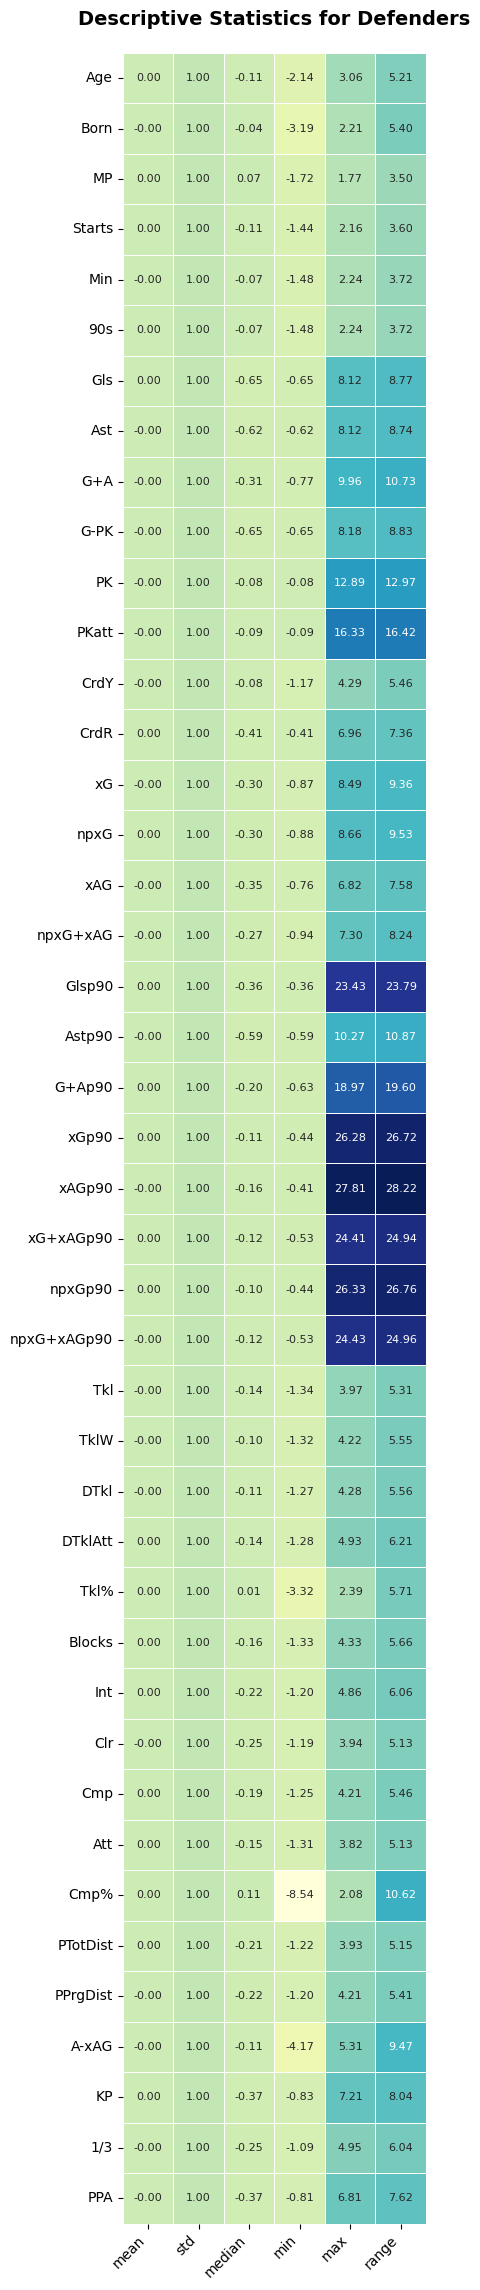

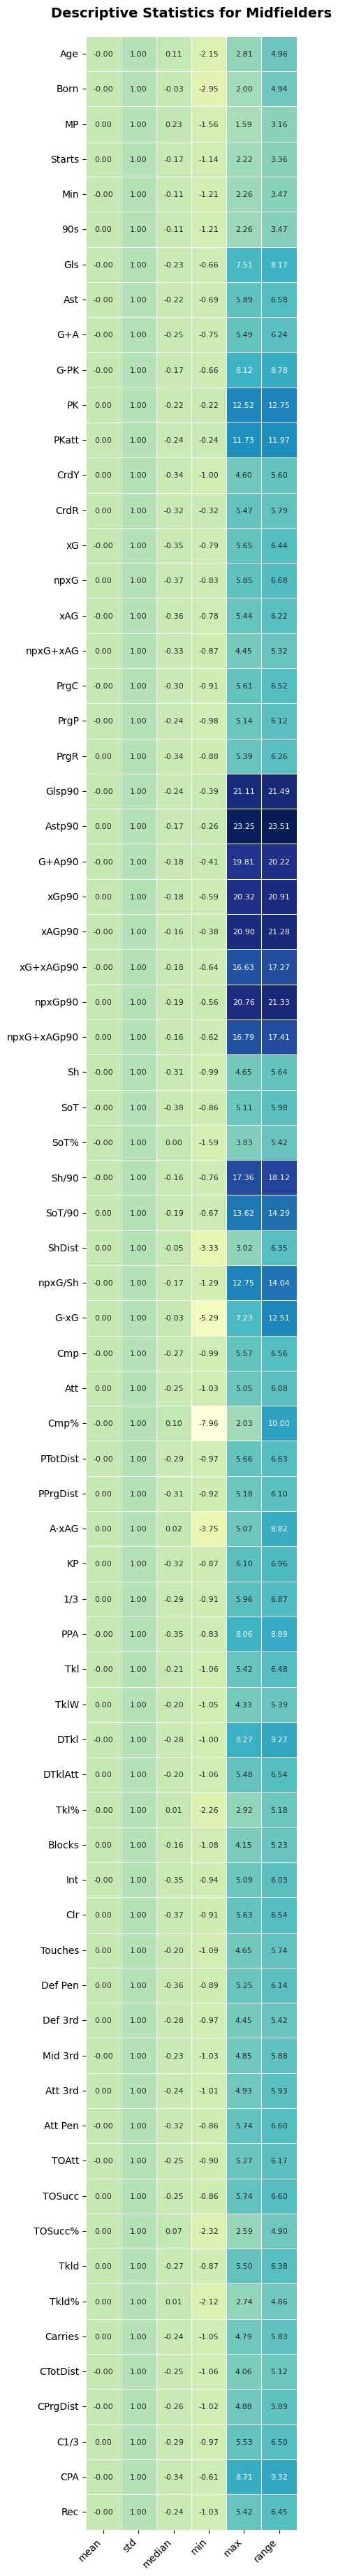

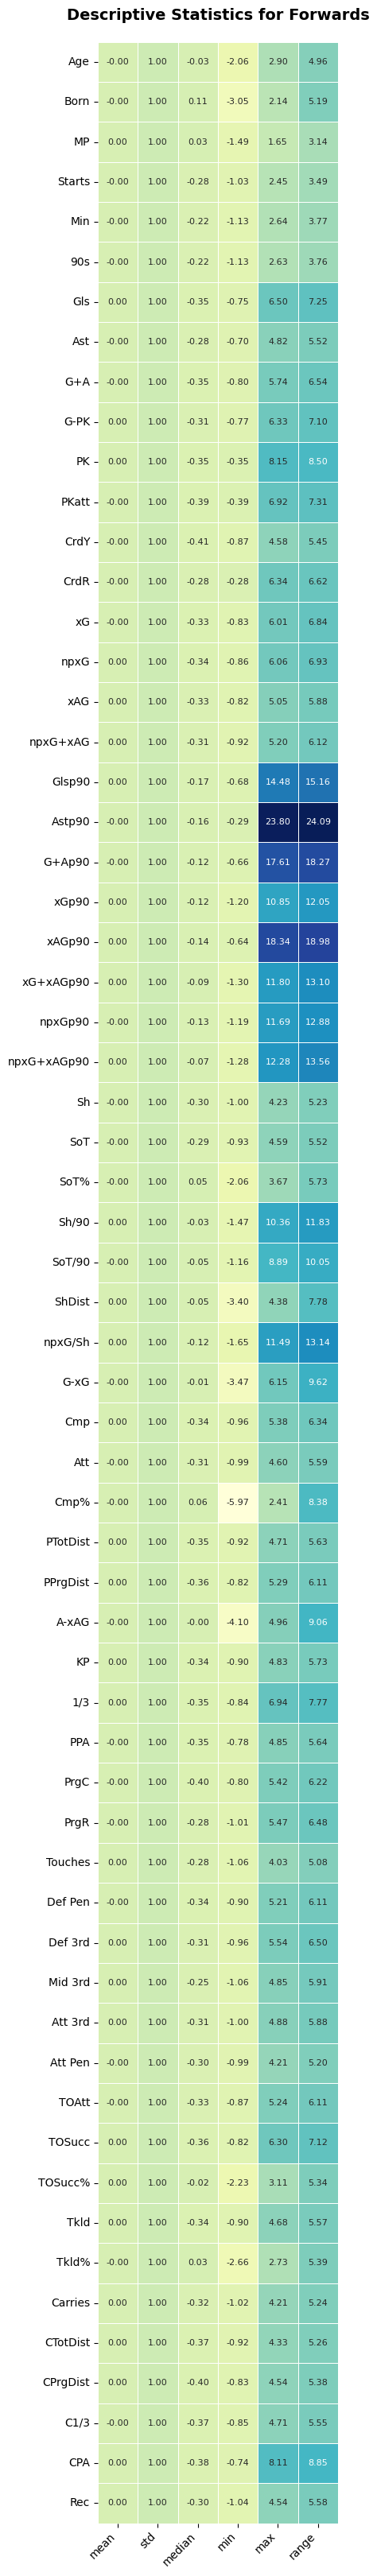

In [53]:
def display_heatmap(stats, title):
    fig, ax = plt.subplots(figsize=(12, len(stats) * 0.5 + 1.5))
    sns.heatmap(stats, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, linewidths=.5, 
                annot_kws={"size": 8}, ax=ax, square=True)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.title(title, fontweight="bold", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()


# generating and displaying heatmap tables for each position's statistics
for position, df in dataframes.items():
    stats = descriptive_stats(df)
    display_heatmap(stats, f"Descriptive Statistics for {position}")


<a id="distribution-and-box-plot-visualization"></a>

## <div class='section'>Section 5: Distribution and Box Plot Visualization</div>

[Return to contents](#contents)

Here, we generate histograms and box plots for each feature to show the distribution and identify potential outliers. The histograms provide insight into how data points are distributed while box plots reveal central tendencies and variability. The histograms and box plots are then saved as PNG files in the 'plots' folder


In [54]:
def plot_and_save_plots(df, position, stats):
    for stat in stats:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        label = stat_labels.get(stat, stat)

        # histogram
        sns.histplot(df[stat].dropna(), kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f'{label} Distribution for {position}')
        axes[0].set_xlabel(label)
        axes[0].set_ylabel('Frequency')

        # boxplot
        sns.boxplot(x=df[stat].dropna(), ax=axes[1], color="lightgreen")
        axes[1].set_title(f'{label} Boxplot for {position}')
        axes[1].set_xlabel(label)

        plt.tight_layout()

        # saving plots
        filename = f"plots/{position}_{stat}_EDA.png".replace(" ", "_")
        plt.savefig(filename, format='png', dpi=300)
        plt.close(fig)

# generating and saving plots for each position
for position, df in dataframes.items():
    print(f"Saving plots for {position}...")
    plot_and_save_plots(df, position, basic_stats[position])

print("All plots have been saved as PNG files.")


Saving plots for Goalkeepers...
Saving plots for Defenders...
Saving plots for Midfielders...
Saving plots for Forwards...
All plots have been saved as PNG files.


<a id="correlation-heatmaps"></a>

## <div class='section'>Section 6: Correlation Heatmaps</div>

[Return to contents](#contents)

Finally, we create correlation heatmaps to explore any positive or negative relationships between features that may be useful for further analysis or model building.


In [55]:
def save_correlation_heatmap(df, position, stats):
    df_filtered = df[stats]
    corr = df_filtered.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True,
                linewidths=0.5, annot_kws={"size": 8})
    plt.title(f'Correlation Heatmap for {position}', fontweight='bold', fontsize=14)
    plt.tight_layout()
    filename = f"heatmap/{position}_correlation_heatmap.png".replace(" ", "_")
    plt.savefig(filename, format='png', dpi=300)
    plt.close()

# generating and saving correlation heatmaps for each position
for position, df in dataframes.items():
    print(f"Generating correlation heatmap for {position}...")
    save_correlation_heatmap(df, position, basic_stats[position])

print("All correlation heatmaps have been saved as PNG files.")


Generating correlation heatmap for Goalkeepers...
Generating correlation heatmap for Defenders...
Generating correlation heatmap for Midfielders...
Generating correlation heatmap for Forwards...
All correlation heatmaps have been saved as PNG files.
